In [94]:
# results obtained from E1
degree = 3
compression_rate = 0.3
eps = 2e-7

In [95]:
%%time
from utils.data import load_ucr_dataset, load_ucr_data_short_and_medium, load_gbnc_data

# load data
data = load_ucr_data_short_and_medium()
#data = load_ucr_dataset(53)
#data = load_gbnc_data()
print("number of time series:", len(data.index))


number of time series: 30574
CPU times: total: 19 s
Wall time: 19.3 s


In [96]:
from utils.plot import add_fitted_curve_to_plot


def fit_spline(method: str, ts: [(float, float)], knots: [float], num_coeffs: int, num_outliers_removed: int,
               degree=None, plot=False, axis=None):
    match method:
        case 'PAA':
            color = 'tab:gray'
            degree = 0
            _, result = fit_max_spline(ts, knots, degree)
            fitted_curve = [evaluate_spline(knots, result, degree, x[0]) for x in ts]

        case 'PLA':
            color = 'tab:olive'
            degree = 1
            _, result = fit_max_spline(ts, knots, degree)
            fitted_curve = [evaluate_spline(knots, result, degree, x[0]) for x in ts]

        case 'L8':
            color = 'tab:pink'
            if degree is None:
                degree = 3

            _, result = fit_max_spline(ts, knots, degree)
            fitted_curve = [evaluate_spline(knots, result, degree, x[0]) for x in ts]

        case 'L8 and L1':
            color = 'tab:blue'
            if degree is None:
                degree = 3

            _, result = fit_max_l1_spline(ts, knots, degree, eps=eps)
            fitted_curve = [evaluate_spline(knots, result, degree, x[0]) for x in ts]

        case 'DFT':
            color = 'tab:green'
            result = fit_DFT(ts, num_coeffs)
            fitted_curve = calculate_inverse_DFT(len(ts), num_coeffs, result)

        case 'LSQ':
            color = 'tab:purple'
            if degree is None:
                degree = 3

            if num_outliers_removed > 0:
                num_xs = len(ts) + num_outliers_removed

                num_coeffs = generate_coeff_counts(num_xs, degree, [compression_rate])[0]
                knots = generate_knot_vector_from_coeff_count(degree=degree, num_coeffs=num_coeffs)

                # Alternative 1 num_coeff Ausreißer (s.u.)
                """knots = generate_knot_vector_from_coeff_count(degree=degree,
                                                              num_coeffs=num_coeffs + num_outliers_removed)"""

                # Alternative 2 (einfach neue Berechnung weglassen)

                xs = np.linspace(0, 1, num=num_xs)
                ts = replace_outliers(ts_without_outliers=ts, original_xs=xs)

            result = fit_LSQ_spline(time_series=ts, knots=knots, degree=degree)
            fitted_curve = [evaluate_spline(knots, result, degree, x[0]) for x in ts]

    max_dist = np.max(np.abs(np.array(fitted_curve) - np.array([x[1] for x in ts])))
    mse = mean_squared_error(fitted_curve, [x[1] for x in ts])
    mae = mean_absolute_error(fitted_curve, [x[1] for x in ts])

    if plot:
        if axis is not None:
            add_fitted_curve_to_plot(axis, [x[0] for x in ts], fitted_curve, max_dist, color=color, label=method)
        else:
            add_fitted_curve_to_plot(plt, [x[0] for x in ts], fitted_curve, max_dist, color=color, label=method)

    return {'max_dist': max_dist,
            'MSE': mse,
            'MAE': mae}


# OHNE AUSREISSER, OHNE PLOTS

In [97]:
"""%%time
from tsfel import mean_diff
from utils.data import remove_outliers, replace_outliers
from utils.spline import generate_coeff_counts, generate_knot_vector_from_coeff_count
from utils.fit import fit_max_spline, fit_max_l1_spline, fit_DFT, calculate_inverse_DFT, fit_LSQ_spline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from utils.spline import evaluate_spline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

results = []
num_rows = len(data.index)
ts_properties = []

for idx, row in data.iterrows():

    ts = row['data']
    print(f"{row['dataset']} no. {row['num']}, {round(idx / num_rows * 100, 1)}% processed")

    ts_properties.append({
        'dataset': row['dataset'],
        'num': row['num'],
        'num_data_pts': len(ts),
        'num_outliers_removed': 0,
        'mean_diff': mean_diff(ts),
        'max_fst_derivative': max(pd.Series([tup[0] for tup in ts]).diff().dropna()),
        'max_snd_derivative': max(pd.Series([tup[0] for tup in ts]).diff().diff().dropna())
    })

    num_coeffs = generate_coeff_counts(len(ts), degree, compression_ratios=[compression_rate])[0]
    knots = generate_knot_vector_from_coeff_count(degree=degree, num_coeffs=num_coeffs)

    for method in ['L8', 'L8 and L1', 'LSQ', 'PAA', 'PLA', 'DFT']:
        metrics = fit_spline(method=method, ts=ts, knots=knots, num_coeffs=num_coeffs, num_outliers_removed=0,
                             degree=degree)

        results.append({
            'dataset': row['dataset'],
            'num': row['num'],
            'num_data_pts': len(ts),
            'num_outliers_removed': 0,
            'num_coeffs': num_coeffs,
            'method': method,
            'max_dist': metrics['max_dist'],
            'MSE': metrics['MSE'],
            'MAE': metrics['MAE']
        })"""


'%%time\nfrom tsfel import mean_diff\nfrom utils.data import remove_outliers, replace_outliers\nfrom utils.spline import generate_coeff_counts, generate_knot_vector_from_coeff_count\nfrom utils.fit import fit_max_spline, fit_max_l1_spline, fit_DFT, calculate_inverse_DFT, fit_LSQ_spline\nfrom sklearn.metrics import mean_squared_error, mean_absolute_error\nfrom utils.spline import evaluate_spline\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport pandas as pd\n\nresults = []\nnum_rows = len(data.index)\nts_properties = []\n\nfor idx, row in data.iterrows():\n\n    ts = row[\'data\']\n    print(f"{row[\'dataset\']} no. {row[\'num\']}, {round(idx / num_rows * 100, 1)}% processed")\n\n    ts_properties.append({\n        \'dataset\': row[\'dataset\'],\n        \'num\': row[\'num\'],\n        \'num_data_pts\': len(ts),\n        \'num_outliers_removed\': 0,\n        \'mean_diff\': mean_diff(ts),\n        \'max_fst_derivative\': max(pd.Series([tup[0] for tup in ts]).diff().dropna()),\

# MIT AUSREISSERN, OHNE PLOTS

In [98]:
%%time

from tsfel import mean_diff
from utils.data import remove_outliers, replace_outliers
from utils.spline import generate_coeff_counts, generate_knot_vector_from_coeff_count
from utils.fit import fit_max_spline, fit_max_l1_spline, fit_DFT, calculate_inverse_DFT, fit_LSQ_spline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from utils.spline import evaluate_spline
import pandas as pd

results = []
num_rows = len(data.index)
ts_properties = []

for idx, row in data.iterrows():
    original_time_series = row['data']
    time_series_lof = remove_outliers(row['data'])
    n_outliers = len(original_time_series) - len(time_series_lof)
    print(f"{row['dataset']} no. {row['num']}, {round(idx / num_rows * 100, 1)}% processed")

    #f, axes = plt.subplots(1, 2, sharey=True)
    #f.set_figwidth(12)

    #axes[0].set_title("Data including outliers")
    #axes[1].set_title("Data without outliers")

    for ts, num_outliers_removed in [(original_time_series, -1),(time_series_lof, n_outliers)]:
        #for ts in [original_time_series, time_series_lof]:
        #num_outliers_removed = len(original_time_series) - len(ts)
        #assert num_outliers_removed >= 0
        #print("len(ts):", len(ts))

        if num_outliers_removed == 0:
            continue

        ts_properties.append({
            'dataset': row['dataset'],
            'num': row['num'],
            'num_data_pts': len(ts),
            'num_outliers_removed': num_outliers_removed if num_outliers_removed >= 0 else 0,
            'mean_diff': mean_diff(ts),
            'max_fst_derivative': max(pd.Series([tup[0] for tup in ts]).diff().dropna()),
            'max_snd_derivative': max(pd.Series([tup[0] for tup in ts]).diff().diff().dropna())
        })

        # Alternative 1 zur Berechnung der Koeffizienten bei TS ohne Ausreißer
        #num_coeffs = generate_coeff_counts(len(original_time_series), degree, compression_ratios=[compression_rate])[0]
        #knots = generate_knot_vector_from_coeff_count(degree=degree, num_coeffs=(num_coeffs - num_outliers_removed))

        # Alternative 2 zur Berechnung der Koeffizienten bei TS ohne Ausreißer
        #num_coeffs = generate_coeff_counts(len(original_time_series), degree, compression_ratios=[compression_rate])[0]
        #knots = generate_knot_vector_from_coeff_count(degree=degree, num_coeffs=num_coeffs)

        # ursprüngliche Variante (es müssen compr_rate * n_outliers viele Punkte zusätzlich gespeichert werden)
        num_coeffs = generate_coeff_counts(len(ts), degree, compression_ratios=[compression_rate])[0]
        knots = generate_knot_vector_from_coeff_count(degree=degree, num_coeffs=num_coeffs)

        #fig,ax = plt.subplots()

        for method in ['L8', 'L8 and L1', 'LSQ', 'PAA', 'PLA', 'DFT']:
            #metrics = fit_spline(method, ts, knots, num_coeffs, num_outliers_removed)

            plot_method = False

            #if method in ['L8', 'L8 and L1']:  #'LSQ',
                #if method in ['DFT']:#
                #plot_method = True

            axis = None
            #if num_outliers_removed > 0:
                #axis = axes[1]
            #else:
                #axis = axes[0]

            metrics = fit_spline(method, ts, knots, num_coeffs, num_outliers_removed, plot=plot_method, axis=axis)

            results.append({
                'dataset': row['dataset'],
                'num': row['num'],
                'num_data_pts': len(ts),
                'num_outliers_removed': num_outliers_removed if num_outliers_removed >= 0 else 0,
                'num_coeffs': num_coeffs,
                'method': method,
                'max_dist': metrics['max_dist'],
                'MSE': metrics['MSE'],
                'MAE': metrics['MAE'],
                #'mean_diff': mean_diff(ts),
                #'fst_derivative': pd.Series([tup[0] for tup in ts]).diff().dropna(),
                #'snd_derivative':pd.Series([tup[0] for tup in ts]).diff().diff().dropna()
            })

        #axis.scatter([d[0] for d in ts], [d[1] for d in ts], color="brown", marker='.')
    
"""plt.subplots_adjust(bottom=0.25, top=0.95)
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
plt.tight_layout()
plt.show()"""


Adiac no. 0, 0.3% processed
Adiac no. 1, 0.3% processed
Adiac no. 2, 0.3% processed
Adiac no. 3, 0.3% processed
Adiac no. 4, 0.3% processed
Adiac no. 5, 0.3% processed
Adiac no. 6, 0.3% processed
Adiac no. 7, 0.3% processed
Adiac no. 8, 0.4% processed
Adiac no. 9, 0.4% processed
Adiac no. 10, 0.4% processed
Adiac no. 11, 0.4% processed
Adiac no. 12, 0.4% processed
Adiac no. 13, 0.4% processed
Adiac no. 14, 0.4% processed
Adiac no. 15, 0.4% processed
Adiac no. 16, 0.4% processed
Adiac no. 17, 0.4% processed
Adiac no. 18, 0.4% processed
Adiac no. 19, 0.4% processed
Adiac no. 20, 0.4% processed
Adiac no. 21, 0.4% processed
Adiac no. 22, 0.4% processed
Adiac no. 23, 0.4% processed
Adiac no. 24, 0.4% processed
Adiac no. 25, 0.4% processed
Adiac no. 26, 0.4% processed
Adiac no. 27, 0.4% processed
Adiac no. 28, 0.4% processed
Adiac no. 29, 0.4% processed
Adiac no. 30, 0.4% processed
Adiac no. 31, 0.4% processed
Adiac no. 32, 0.4% processed
Adiac no. 33, 0.4% processed
Adiac no. 34, 0.4% proce

KeyboardInterrupt: 

In [99]:
import pandas as pd

pd.set_option('display.float_format', '{:.8f}'.format)

e2_results = pd.DataFrame(results).drop_duplicates()
mean_values = e2_results.groupby('method').agg({'max_dist': 'mean', 'MSE': 'mean', 'MAE': 'mean'}).reset_index()
mean_values

,method,max_dist,MSE,MAE
0,DFT,0.02794442,0.00019985,0.00625187
1,L8,0.01877925,0.00039028,0.01232096
2,L8 and L1,0.01896357,0.00023971,0.00735392
3,LSQ,0.02836687,0.00014600,0.00535268
4,PAA,0.16053762,0.01436787,0.10142986
5,PLA,0.03031467,0.00081408,0.02178394


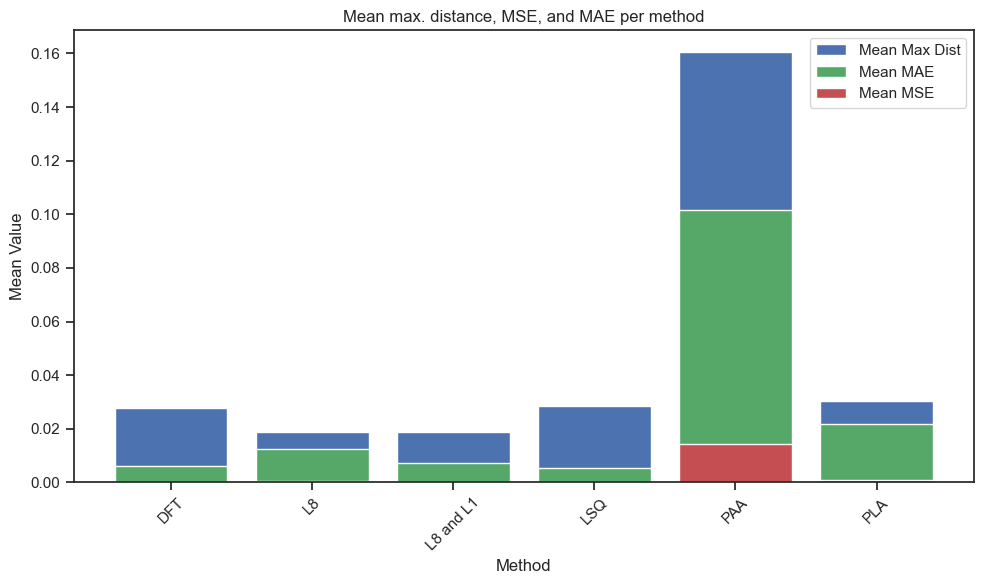

In [100]:
import matplotlib.pyplot as plt

# Plot mean values
plt.figure(figsize=(10, 6))

plt.bar(mean_values['method'], mean_values['max_dist'], color='b', label='Mean Max Dist')
plt.bar(mean_values['method'], mean_values['MAE'], color='g', label='Mean MAE')
plt.bar(mean_values['method'], mean_values['MSE'], color='r', label='Mean MSE')
plt.xlabel('Method')
plt.ylabel('Mean Value')
plt.title('Mean max. distance, MSE, and MAE per method')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [101]:
"""
import pandas as pd
pd.set_option('display.float_format', '{:.8f}'.format)

# Calculate mean values for each accuracy measure separately
mean_max_dist = e2_results.groupby('method')['max_dist'].mean().reset_index()
mean_mse = e2_results.groupby('method')['MSE'].mean().reset_index()
mean_mae = e2_results.groupby('method')['MAE'].mean().reset_index()

# Merge the mean values into a single DataFrame
mean_values = mean_max_dist.merge(mean_mse, on='method').merge(mean_mae, on='method')
mean_values"""

"\nimport pandas as pd\npd.set_option('display.float_format', '{:.8f}'.format)\n\n# Calculate mean values for each accuracy measure separately\nmean_max_dist = e2_results.groupby('method')['max_dist'].mean().reset_index()\nmean_mse = e2_results.groupby('method')['MSE'].mean().reset_index()\nmean_mae = e2_results.groupby('method')['MAE'].mean().reset_index()\n\n# Merge the mean values into a single DataFrame\nmean_values = mean_max_dist.merge(mean_mse, on='method').merge(mean_mae, on='method')\nmean_values"

In [102]:
# combine results df with ts properties df for analysis later
ts_props = pd.DataFrame(ts_properties).drop_duplicates()
e2 = pd.merge(e2_results, ts_props, how='left', on=['dataset', 'num', 'num_data_pts', 'num_outliers_removed'])
e2

,dataset,num,num_data_pts,num_outliers_removed,num_coeffs,method,max_dist,MSE,MAE,mean_diff,max_fst_derivative,max_snd_derivative
0,Adiac,0,176,0,52,L8,0.01174893,0.00007591,0.00780237,-0.50000000,0.00571429,0.00000000
1,Adiac,0,176,0,52,L8 and L1,0.01174913,0.00004443,0.00508272,-0.50000000,0.00571429,0.00000000
2,Adiac,0,176,0,52,LSQ,0.01625998,0.00003225,0.00435606,-0.50000000,0.00571429,0.00000000
3,Adiac,0,176,0,52,PAA,0.15120708,0.01104580,0.09197067,-0.50000000,0.00571429,0.00000000
4,Adiac,0,176,0,52,PLA,0.01807150,0.00016987,0.01152031,-0.50000000,0.00571429,0.00000000
...,...,...,...,...,...,...,...,...,...,...,...,...
326,Adiac,51,176,0,52,LSQ,0.02909985,0.00004307,0.00472218,-0.50000000,0.00571429,0.00000000
327,Adiac,51,176,0,52,PAA,0.19067697,0.01831121,0.12059064,-0.50000000,0.00571429,0.00000000
328,Adiac,51,176,0,52,PLA,0.02548296,0.00036962,0.01757775,-0.50000000,0.00571429,0.00000000
329,Adiac,51,176,0,52,DFT,0.03357801,0.00005330,0.00549814,-0.50000000,0.00571429,0.00000000


# comparison: outliers vs. no outliers (for each method)

In [103]:
df_no_outliers = e2[e2['num_outliers_removed'] > 0]
df_with_outliers = e2[e2['num_outliers_removed'] == 0]
#df_no_outliers = e2_results[e2_results['num_outliers_removed'] > 0]
#df_with_outliers = e2_results[e2_results['num_outliers_removed'] == 0]

mean_values_no_outliers = df_no_outliers.groupby('method').agg(
    {'max_dist': 'mean', 'MSE': 'mean', 'MAE': 'mean'}).reset_index()
mean_values_no_outliers.rename(columns={'max_dist': 'max_dist w/o o.', 'MSE': 'MSE w/o o.', 'MAE': 'MAE w/o o.'},
                               inplace=True)

mean_values_with_outliers = df_with_outliers.groupby('method').agg(
    {'max_dist': 'mean', 'MSE': 'mean', 'MAE': 'mean'}).reset_index()
mean_values_with_outliers.rename(columns={'max_dist': 'max_dist', 'MSE': 'MSE', 'MAE': 'MAE'}, inplace=True)

mean_values_combined = pd.merge(mean_values_with_outliers, mean_values_no_outliers, on='method', how='outer')
mean_values_combined

,method,max_dist,MSE,MAE,max_dist w/o o.,MSE w/o o.,MAE w/o o.
0,DFT,0.02299356,0.00010373,0.00462965,0.11375928,0.00186583,0.03437038
1,L8,0.01698233,0.00030873,0.01118256,0.05052481,0.00183103,0.03243266
2,L8 and L1,0.01714272,0.00017994,0.00646868,0.05052501,0.00127580,0.02269807
3,LSQ,0.02461186,0.00010946,0.00464722,0.09345372,0.00077937,0.01758061
4,PAA,0.15573501,0.01291720,0.09716990,0.24378279,0.03951274,0.17526917
5,PLA,0.02846457,0.00070154,0.02067238,0.06238298,0.00276468,0.04105093


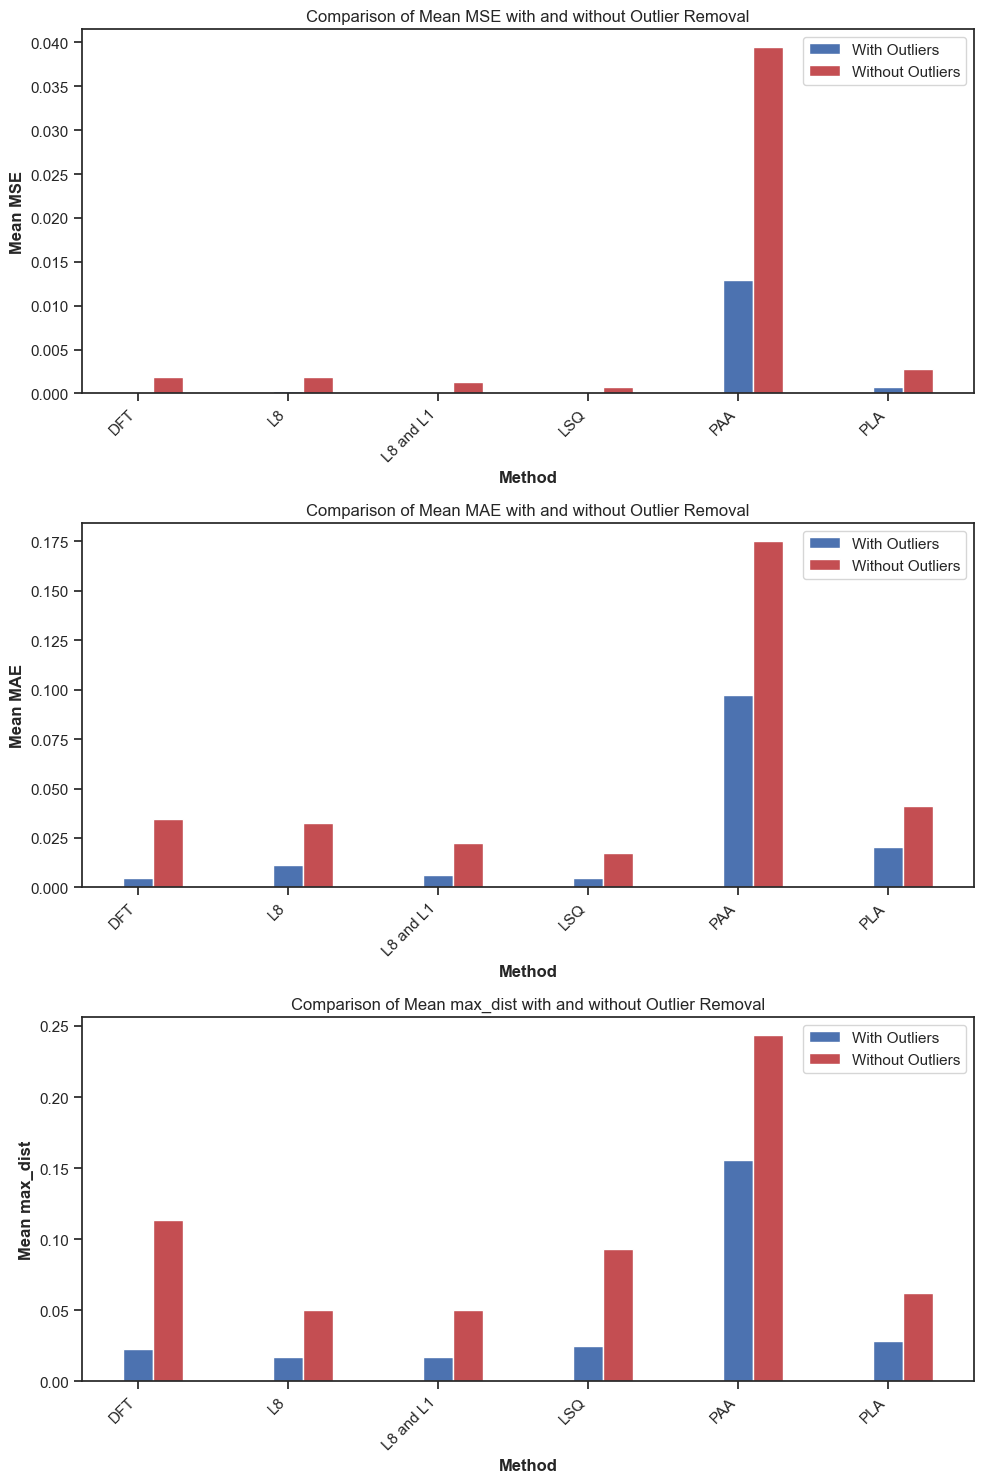

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual mean accuracy values)
methods = mean_values_combined['method']
metrics = ['MSE', 'MAE', 'max_dist']

# Set the width of the bars
bar_width = 0.2
num_methods = len(methods)
r = np.arange(num_methods)

# Create subplots for each accuracy measure
fig, axs = plt.subplots(len(metrics), figsize=(10, 15))

for i, metric in enumerate(metrics):
    metric_with_outliers = mean_values_combined[metric]
    metric_without_outliers = mean_values_combined[f'{metric} w/o o.']

    # Set the position of the bars for each accuracy measure
    r1 = r + bar_width/2
    r2 = [x + bar_width for x in r1]

    # Create the bar plots for each accuracy measure
    axs[i].bar(r1, metric_with_outliers, color='b', width=bar_width, label='With Outliers')
    axs[i].bar(r2, metric_without_outliers, color='r', width=bar_width, label='Without Outliers')

    # Add labels and title
    axs[i].set_xlabel('Method', fontweight='bold')
    axs[i].set_ylabel(f'Mean {metric}', fontweight='bold')
    axs[i].set_xticks([r + bar_width/2 for r in range(num_methods)])
    axs[i].set_xticklabels(methods, rotation=45, ha='right')
    axs[i].set_title(f'Comparison of Mean {metric} with and without Outlier Removal')
    axs[i].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# examine correlation between properties for a given method

In [105]:
import statsmodels.api as sm

# Correlation Analysis
correlation_matrix = e2[e2['method']=='L8 and L1'][
    ['max_dist', 'MSE', 'MAE', 'num_data_pts', 'mean_diff', 'max_fst_derivative', 'max_snd_derivative']].corr()
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,max_dist,MSE,MAE,num_data_pts,mean_diff,max_fst_derivative,max_snd_derivative
max_dist,1.00000000,0.95154495,0.98048802,-0.32523477,0.42600226,0.45144899,0.45144899
MSE,0.95154495,1.00000000,0.98915361,-0.31358783,0.46685042,0.44083960,0.44083960
MAE,0.98048802,0.98915361,1.00000000,-0.33648368,0.46525864,0.46461743,0.46461743
num_data_pts,-0.32523477,-0.31358783,-0.33648368,1.00000000,-0.92979039,-0.92008360,-0.92008360
mean_diff,0.42600226,0.46685042,0.46525864,-0.92979039,1.00000000,0.92693643,0.92693643
max_fst_derivative,0.45144899,0.44083960,0.46461743,-0.92008360,0.92693643,1.00000000,1.00000000
max_snd_derivative,0.45144899,0.44083960,0.46461743,-0.92008360,0.92693643,1.00000000,1.00000000


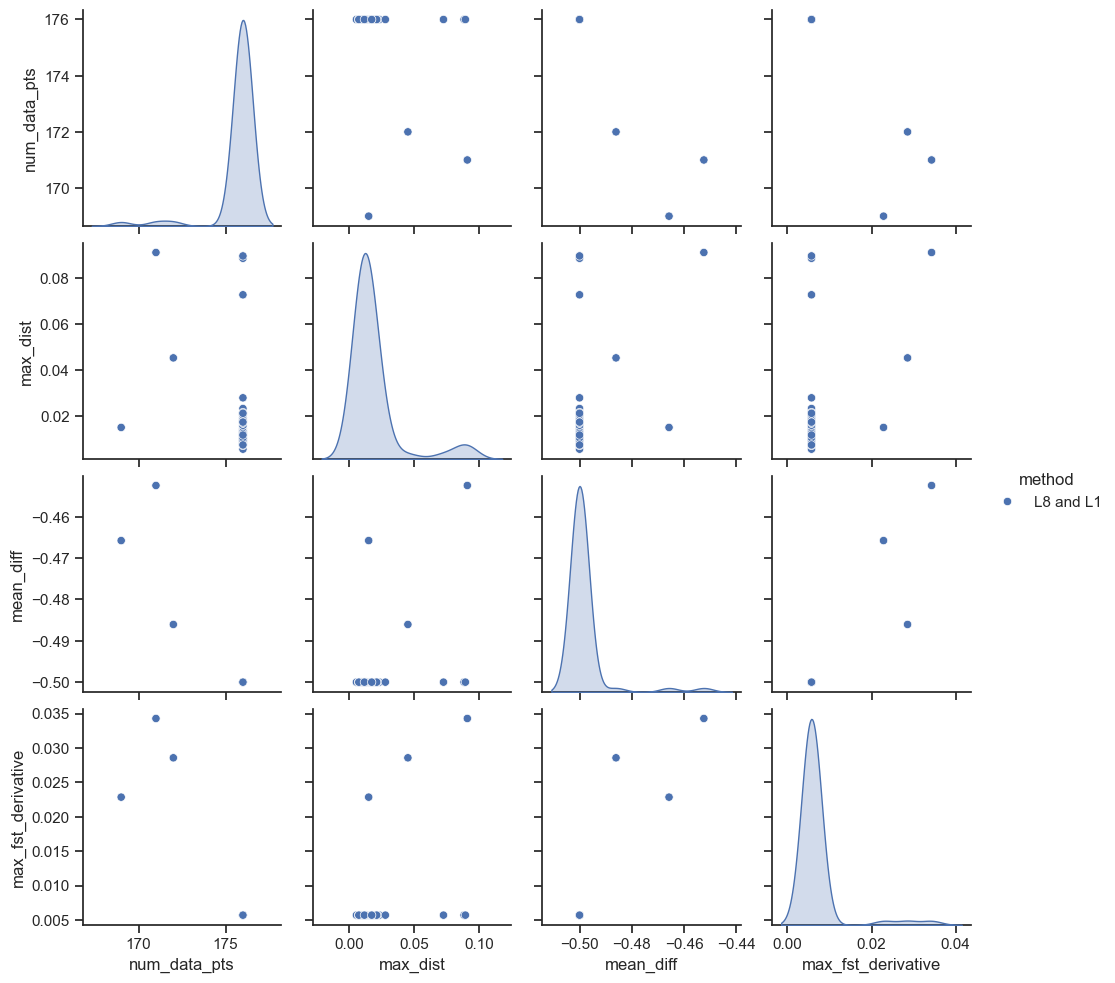

In [106]:
import seaborn as sns
sns.set_theme(style="ticks")
# for method in ['L8', 'L8 and L1', 'LSQ', 'PAA', 'PLA', 'DFT']:
df = e2[e2['method']=='L8 and L1']
sns.pairplot(df[['num_data_pts','method','max_dist','mean_diff','max_fst_derivative']],hue="method")

# ... regression analysis?

In [107]:
# Regression Analysis
X = e2[['num_data_pts', 'mean_diff', 'max_fst_derivative', 'max_snd_derivative']]
y = e2['max_dist']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               max_dist   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     8.097
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           3.23e-05
Time:                        18:57:30   Log-Likelihood:                 481.79
No. Observations:                 331   AIC:                            -955.6
Df Residuals:                     327   BIC:                            -940.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4145      1

In [108]:
import pandas as pd
import statsmodels.api as sm

# Load your dataframe
# Assuming your dataframe is named 'df'

# Convert 'mean_diff' column to numeric (if not already)
e2['mean_diff'] = pd.to_numeric(e2['mean_diff'], errors='coerce')

# Drop rows with NaN values in 'mean_diff' column
df = e2.dropna(subset=['mean_diff'])

# Filter relevant columns
data = df[['mean_diff', 'max_dist', 'num_outliers_removed', 'method']]

# Create dummy variables for the 'method' column
data = pd.get_dummies(data, columns=['method'], drop_first=True)

# Separate data for num_outliers > 0 and num_outliers == 0
data_with_outliers = data[data['num_outliers_removed'] > 0]
data_without_outliers = data[data['num_outliers_removed'] == 0]

# Separate independent (X) and dependent (y) variables for each case
X_with_outliers = data_with_outliers.drop(columns=['max_dist', 'num_outliers_removed'])
y_with_outliers = data_with_outliers['max_dist']

X_without_outliers = data_without_outliers.drop(columns=['max_dist', 'num_outliers_removed'])
y_without_outliers = data_without_outliers['max_dist']

# Add constant for intercept term
X_with_outliers = sm.add_constant(X_with_outliers)
X_without_outliers = sm.add_constant(X_without_outliers)

# Fit the regression model for each case
model_with_outliers = sm.OLS(y_with_outliers, X_with_outliers.astype(float)).fit()
model_without_outliers = sm.OLS(y_without_outliers, X_without_outliers.astype(float)).fit()

# Print results
print("Results for num_outliers > 0:")
print(model_with_outliers.summary())

print("\nResults for num_outliers == 0:")
print(model_without_outliers.summary())


Results for num_outliers > 0:
                            OLS Regression Results                            
Dep. Variable:               max_dist   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     6.988
Date:                Mon, 12 Feb 2024   Prob (F-statistic):            0.00293
Time:                        18:57:30   Log-Likelihood:                 34.417
No. Observations:                  18   AIC:                            -54.83
Df Residuals:                      11   BIC:                            -48.60
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

C:\Users\veron\Desktop\Bachelorarbeit_Info\Code\splineRegressionExperiments\venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  k, _ = kurtosistest(a, axis)
